In [1]:
import pandas as pd

sentiment_df = pd.read_csv("/content/drive/MyDrive/ML Practice/fear_greed_index.csv")
trades_df = pd.read_csv("/content/drive/MyDrive/ML Practice/historical_data.csv")


In [6]:
sentiment_df.head()



,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [41]:
sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trades_df.head()
trades_df.info()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [23]:
#2️⃣ Fix datetime columns (VERY IMPORTANT)
trades_df["Timestamp IST"] = pd.to_datetime(trades_df["Timestamp IST"])
trades_df["date"] = trades_df["Timestamp IST"].dt.date


In [17]:
#Sentiment dataset
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
sentiment_df["date"] = sentiment_df["date"].dt.date


In [18]:
#3️⃣ Rename columns (professional & clean)
trades_df = trades_df.rename(columns={
    "Account": "account",
    "Coin": "symbol",
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Closed PnL": "closed_pnl",
    "Fee": "fee",
    "Direction": "direction"
})


In [19]:
#4️⃣ Clean trader data (company expects this)
trades_df = trades_df.dropna(subset=["closed_pnl"])
trades_df = trades_df[trades_df["size_usd"] > 0]


In [20]:
trades_df = trades_df[trades_df["closed_pnl"].abs() < trades_df["closed_pnl"].quantile(0.99)]


In [24]:
#5️⃣ Merge trader data with sentiment data (CORE STEP)
merged_df = trades_df.merge(
    sentiment_df,
    on="date",
    how="left"
)


In [26]:
merged_df["classification"].isna().sum()


np.int64(2)

In [27]:
#TASK 1 (short): Market sentiment overview
sentiment_df["classification"].value_counts()


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


<Axes: title={'center': 'Bitcoin Market Sentiment Distribution'}, xlabel='classification'>

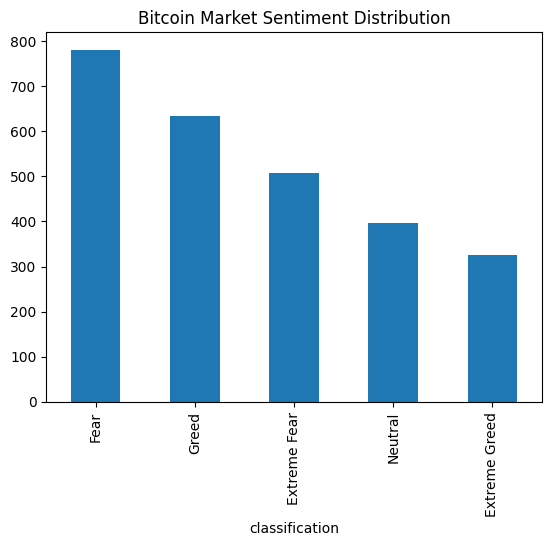

In [51]:
#Plot 1: Sentiment distribution
sentiment_df["classification"].value_counts().plot(
    kind="bar",
    title="Bitcoin Market Sentiment Distribution"
)


In [49]:
#7️⃣ TASK 2 (CORE): Trader performance vs sentiment
#7.1 Profitability analysis
pnl_summary = merged_df.groupby("classification")["closed_pnl"].agg(
    avg_pnl="mean",
    median_pnl="median",
    win_rate=lambda x: (x > 0).mean(),
    trades="count"
)
pnl_summary

,avg_pnl,median_pnl,win_rate,trades
classification,,,,
Extreme Fear,13.894739,0.0,0.367517,21082
Extreme Greed,25.953540,0.0,0.459216,39452
Fear,19.998086,0.0,0.414955,61062
Greed,19.226062,0.0,0.380377,49698
Neutral,16.527229,0.0,0.392581,37312


<Axes: title={'center': 'Average Trader PnL by Market Sentiment'}, xlabel='classification'>

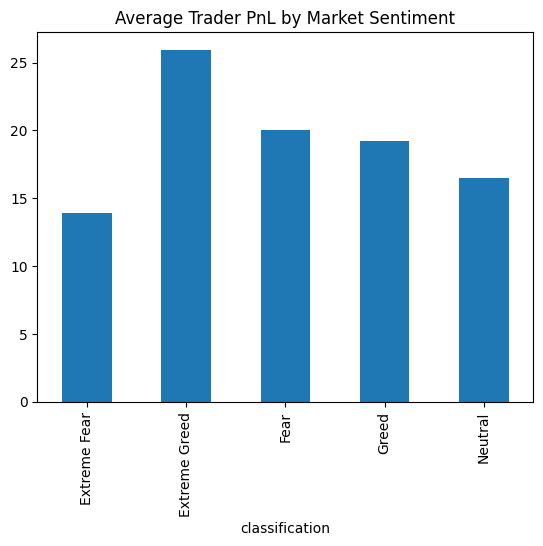

In [52]:
#Plot 2: Average PnL vs Sentiment
pnl_summary["avg_pnl"].plot(
    kind="bar",
    title="Average Trader PnL by Market Sentiment"
)


In [55]:
#7.2 Win rate analysis (VERY IMPORTANT)
merged_df["is_profit"] = merged_df["closed_pnl"] > 0

merged_df.groupby("classification")["is_profit"].mean()


,is_profit
classification,
Extreme Fear,0.367517
Extreme Greed,0.459216
Fear,0.414955
Greed,0.380377
Neutral,0.392581


<Axes: title={'center': 'Trade Win Rate by Market Sentiment'}, xlabel='classification'>

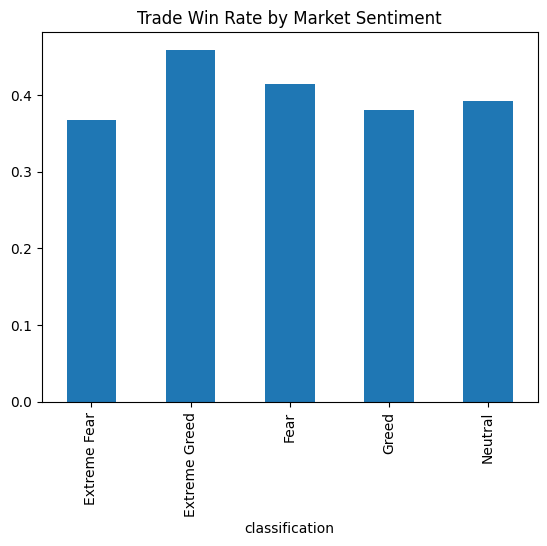

In [56]:
#Plot 3: Win rate vs Sentiment
pnl_summary["win_rate"].plot(
    kind="bar",
    title="Trade Win Rate by Market Sentiment"
)


In [39]:
#7.3 Risk behavior analysis
risk_summary = merged_df.groupby("classification")[["size_usd", "fee"]].mean()
risk_summary



,size_usd,fee
classification,,
Extreme Fear,4707.494154,0.984254
Extreme Greed,2881.477078,0.625062
Fear,6472.794983,1.296483
Greed,5070.691118,1.140316
Neutral,3875.722323,0.866725


<Axes: title={'center': 'Average Trade Size by Market Sentiment'}, xlabel='classification'>

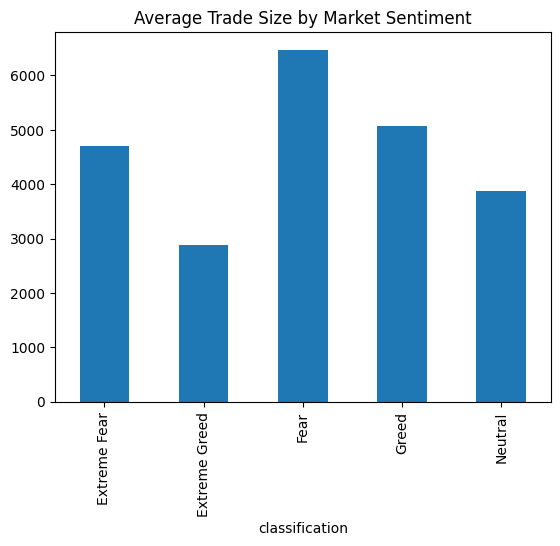

In [57]:
#Plot 4: Risk exposure vs Sentiment
risk_summary["size_usd"].plot(
    kind="bar",
    title="Average Trade Size by Market Sentiment"
)


In [32]:
#7.4 Loss severity (downside risk)
merged_df.groupby("classification")["closed_pnl"].min()


,closed_pnl
classification,
Extreme Fear,-1016.840176
Extreme Greed,-1014.229706
Fear,-1005.494534
Greed,-1002.197856
Neutral,-1022.564800


In [33]:
#8️⃣ Trader-level behavior (this makes you stand out)

trader_summary = merged_df.groupby("account").agg(
    total_pnl=("closed_pnl", "sum"),
    avg_trade_size=("size_usd", "mean"),
    trades=("closed_pnl", "count")
).sort_values("total_pnl", ascending=False)


In [36]:
risk_summary = merged_df.groupby("classification")[["size_usd", "fee"]].mean()
risk_summary


,size_usd,fee
classification,,
Extreme Fear,4707.494154,0.984254
Extreme Greed,2881.477078,0.625062
Fear,6472.794983,1.296483
Greed,5070.691118,1.140316
Neutral,3875.722323,0.866725


In [48]:
pnl_summary = merged_df.groupby("classification")["closed_pnl"].agg(
    avg_pnl="mean",
    median_pnl="median",
    win_rate=lambda x: (x > 0).mean(),
    trades="count"
)
pnl_summary


,avg_pnl,median_pnl,win_rate,trades
classification,,,,
Extreme Fear,13.894739,0.0,0.367517,21082
Extreme Greed,25.953540,0.0,0.459216,39452
Fear,19.998086,0.0,0.414955,61062
Greed,19.226062,0.0,0.380377,49698
Neutral,16.527229,0.0,0.392581,37312
